# FYSS5403 Homework 1, Otto Salmenkivi

## Excercise 1
Qiskit installed

In [1]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

/Applications/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


## Excercise 2

After aplying the hadamart gate on $\Phi$, $H\Phi$, we get for the probability $\alpha$ for state 0:  

$`\alpha = |sin(\theta) + e^{i\phi}cos(\theta)|^2 = sin(2 \theta)cos(\phi)+1 \Rightarrow \phi = arccos\left(\frac{\alpha -1}{sin2\theta}\right)`$

In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
import numpy as np

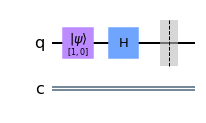

In [17]:
qc = QuantumCircuit(1,1)
#lets set parameters theta and phi
theta= np.pi/2
phi = np.pi/2
#set the state with U3 gate
#qc.u(np.pi-2*theta, phi,0,0)

#or with initialize

alkutila = [np.sin(theta),np.exp(1j*phi)*np.cos(theta)]
qc.initialize(alkutila,0)

#lets use a hadamard gate to superpose the states on qubit 1
qc.h(0)
qc.barrier()
qc.draw('mpl')

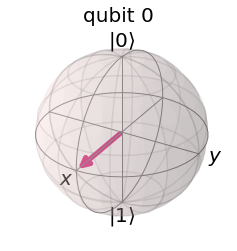

In [18]:
#lets plot the bloch vector
statesimulator = Aer.get_backend('statevector_simulator')
blochvector1 = execute(qc,backend = statesimulator).result().get_statevector()
plot_bloch_multivector(blochvector1)

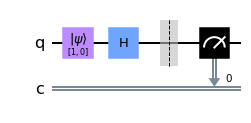

In [19]:
# adding the measurment gate
qc.measure(0,0)
qc.draw('mpl')


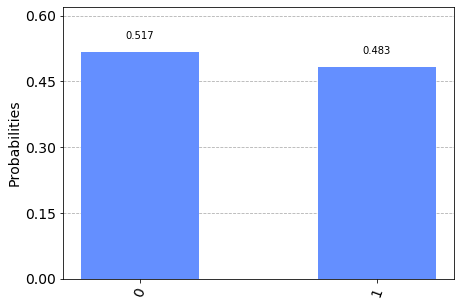

In [20]:
#Lets run the circuit on the IBMQ simulator
simulator = provider.get_backend('ibmq_qasm_simulator')
shots = 1024
job = execute(qc, backend=simulator, shots = shots)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [23]:
#lets calculate phi
zeros = counts.get('0')
print('The state 0 has been measured ',zeros,' times.')
mysteryphi = np.arccos(((zeros/shots)-1)/(np.sin(2*theta)))
print('The set relative phase phi was ',np.round(phi,3),', and value base on the measurements was'
      ,np.round(mysteryphi,3),'.')
print('NOT WORKING')

The state 0 has been measured  529  times.
The set relative phase phi was  1.571 , and value base on the measurements was nan .
NOT WORKING


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


## Excercise 3
Lets build two one qubit circuits with the first crcuits with $u_3$ gate with $`\theta = \phi = \frac{\pi}{3}`$ and the second with our custom gate.

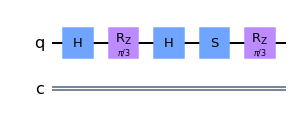

In [8]:
circuit1 = QuantumCircuit(1,1)
circuit2 = QuantumCircuit(1,1)
theta, phi = np.pi/3,np.pi/3


circuit1.h(0)
circuit1.rz(phi,0)
circuit1.h(0)
circuit1.s(0)
circuit1.rz(phi,0)
circuit1.draw(output = 'mpl')


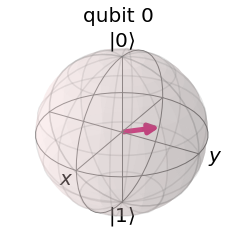

In [9]:
backend = Aer.get_backend('statevector_simulator')
blochvector2 = execute(circuit1,backend).result().get_statevector()
plot_bloch_multivector(blochvector2)

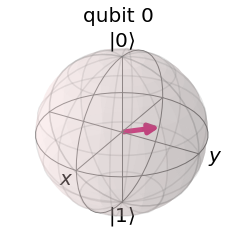

In [10]:
circuit2.u(theta,phi,0,0)
backend = Aer.get_backend('statevector_simulator')
blochvector3 = execute(circuit2,backend).result().get_statevector()
plot_bloch_multivector(blochvector3)

In [11]:
#Let's add measurement gates 
circuit1.measure(0,0)
circuit2.measure(0,0)

In [12]:
# Algorithm for least busy from Moodle notes
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
# running the custom gate on quantum computer
qcomp = provider.get_backend('ibmq_ourense')
job3a = execute(circuit1, backend=qcomp, shots = 1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job3a)

Job Status: job has successfully run


In [15]:
# running the standard gate on quantum computer
job3b = execute(circuit2, backend=qcomp, shots = 1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job3b)

Job Status: job has successfully run


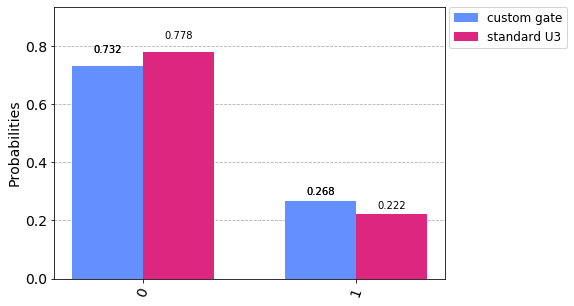

In [16]:
#plotting the results
counts3a = job3a.result().get_counts()
counts3b = job3b.result().get_counts()
plot_histogram([counts3a,counts3b], legend = ['custom gate', 'standard U3'])

As visible on the histogram above, the custom gate matches with the standard U3 gate with $`\theta = \phi = \frac{\pi}{3}`$, but it seems to be a bit more prone to error.

## Excercise 4
Let's prove the identities by calculating the corresponding matrices  

1)
$`
HXH = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\1 & -1 \end{bmatrix}
\begin{bmatrix}0 & 1 \\1 & 0 \end{bmatrix}
\frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\1 & -1 \end{bmatrix}
=\frac{1}{2}\begin{bmatrix}1 & 1 \\1 & -1 \end{bmatrix}
\begin{bmatrix}1 & -1 \\1 & 1 \end{bmatrix}
=\frac{1}{2}\begin{bmatrix}2 & 0 \\0 & -2 \end{bmatrix}
=\begin{bmatrix}1 & 0 \\0 & -1 \end{bmatrix}= Z
`$